# Adidas Sales Dataset

In [2]:
import pandas as pd

data = pd.read_excel("Adidas_Sales_Dataset.xlsx")

display(data)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


### a. List all the products sold in every region.

In [8]:
for i,j in data.groupby("Region")["Product"]:
    print("-"*50)
    print(i)
    print("-"*50)
    display(j.drop_duplicates().reset_index())
    print("\n")

--------------------------------------------------
Midwest
--------------------------------------------------


,index,Product
0,288,Men's Apparel
1,289,Women's Apparel
2,290,Men's Street Footwear
3,291,Men's Athletic Footwear
4,292,Women's Street Footwear
5,293,Women's Athletic Footwear




--------------------------------------------------
Northeast
--------------------------------------------------


,index,Product
0,0,Men's Street Footwear
1,1,Men's Athletic Footwear
2,2,Women's Street Footwear
3,3,Women's Athletic Footwear
4,4,Men's Apparel
5,5,Women's Apparel




--------------------------------------------------
South
--------------------------------------------------


,index,Product
0,72,Men's Apparel
1,73,Women's Apparel
2,74,Men's Street Footwear
3,75,Men's Athletic Footwear
4,76,Women's Street Footwear
5,77,Women's Athletic Footwear




--------------------------------------------------
Southeast
--------------------------------------------------


,index,Product
0,720,Men's Apparel
1,721,Women's Apparel
2,722,Men's Street Footwear
3,723,Men's Athletic Footwear
4,724,Women's Street Footwear
5,725,Women's Athletic Footwear




--------------------------------------------------
West
--------------------------------------------------


,index,Product
0,144,Men's Apparel
1,145,Women's Apparel
2,146,Men's Street Footwear
3,147,Men's Athletic Footwear
4,148,Women's Street Footwear
5,149,Women's Athletic Footwear


### b. Find the Cities and the retailers who sold womens related products.

In [ ]:
women_products = data[data['Product'].str.contains('women', case=False)]

display(women_products[['City', 'Retailer', 'Product']].drop_duplicates())

,City,Retailer,Product
2,New York,Foot Locker,Women's Street Footwear
3,New York,Foot Locker,Women's Athletic Footwear
5,New York,Foot Locker,Women's Apparel
47,New York,Walmart,Women's Apparel
50,New York,Walmart,Women's Street Footwear
...,...,...,...
3818,Manchester,Amazon,Women's Apparel
3821,Manchester,Amazon,Women's Street Footwear
3863,Manchester,Foot Locker,Women's Street Footwear
3864,Manchester,Foot Locker,Women's Athletic Footwear


### c. Find the total sales of each womens product in in-store method.

In [ ]:
women_sales = data['Product'].str.contains('women', case=False)
in_store_sales = data['Sales Method'] == 'In-store'

women_instore_sales = data[women_sales & in_store_sales]

print(women_instore_sales.groupby('Product')['Total Sales'].sum())

Product
Women's Apparel              70248750.0
Women's Athletic Footwear    40520000.0
Women's Street Footwear      48349250.0
Name: Total Sales, dtype: float64


### d. For each product, find region wise total sales and units sold.

In [ ]:
df = data.groupby(['Product', 'Region'])[['Total Sales', 'Units Sold']]

display(df.sum().reset_index())

,Product,Region,Total Sales,Units Sold
0,Men's Apparel,Midwest,18125661.0,45304
1,Men's Apparel,Northeast,25744412.0,62031
2,Men's Apparel,South,19703069.0,60641
3,Men's Apparel,Southeast,24461487.0,54385
4,Men's Apparel,West,35694003.0,84322
5,Men's Athletic Footwear,Midwest,21305539.0,65120
6,Men's Athletic Footwear,Northeast,28874237.0,81474
7,Men's Athletic Footwear,South,25710545.0,90079
8,Men's Athletic Footwear,Southeast,27777020.0,71129
9,Men's Athletic Footwear,West,50006339.0,127724


### e. For men’s and women’s products, find state wise units sold and total sales.

In [ ]:
df = data[data['Product'].str.contains('men', case=False)]

display(df.groupby(['Product', 'State'])[['Units Sold', 'Total Sales']].sum())

Units Sold  Total Sales
Product                 State                                 
Men's Apparel           Alabama              7285    2211662.0
                        Alaska               3211    1677524.0
                        Arizona              5233    1890308.0
                        Arkansas             6354    1991980.0
                        California          22543    8862102.0
...                                           ...          ...
Women's Street Footwear Virginia             9048    3464940.0
                        Washington           7968    4229292.0
                        West Virginia        4207    1175780.0
                        Wisconsin            3281     803727.0
                        Wyoming              7584    2422141.0

[300 rows x 2 columns]

### f. Find states where women’s products sold were more than men’s products.

In [ ]:
# Not Completed

#df1 = data[data['Product'].str.contains('Men')]
#df2 = data[data['Product'].str.contains('Women')]

#display(df1.groupby(['Product', 'State'])['Units Sold'].sum().reset_index())
#display(df2.groupby(['Product', 'State'])['Units Sold'].sum().reset_index())

### g. Find region wise units sold for each product.

In [ ]:
display(data.groupby(['Product', 'Region'])['Units Sold'].sum().reset_index())

,Product,Region,Units Sold
0,Men's Apparel,Midwest,45304
1,Men's Apparel,Northeast,62031
2,Men's Apparel,South,60641
3,Men's Apparel,Southeast,54385
4,Men's Apparel,West,84322
5,Men's Athletic Footwear,Midwest,65120
6,Men's Athletic Footwear,Northeast,81474
7,Men's Athletic Footwear,South,90079
8,Men's Athletic Footwear,Southeast,71129
9,Men's Athletic Footwear,West,127724


### h. Find region wise profit for every retailer.

In [ ]:
display(data.groupby(['Retailer', 'Region'])['Operating Profit'].sum().reset_index())

,Retailer,Region,Operating Profit
0,Amazon,Midwest,6833799.77
1,Amazon,Northeast,13398857.39
2,Amazon,South,146947.48
3,Amazon,Southeast,4295093.92
4,Amazon,West,4143804.75
5,Foot Locker,Midwest,18245522.25
6,Foot Locker,Northeast,23914657.67
7,Foot Locker,South,3679974.61
8,Foot Locker,Southeast,22531766.77
9,Foot Locker,West,12350203.51


### i. Find the states along with units sold where products sold in more than one city in the state.

In [ ]:
city_count = data.groupby(['State', 'Product']).agg({'Units Sold': 'sum'})

display(city_count[city_count > 1])

Units Sold
State   Product                              
Alabama Men's Apparel                    7285
        Men's Athletic Footwear         12232
        Men's Street Footwear           12612
        Women's Apparel                 11828
        Women's Athletic Footwear        8003
...                                       ...
Wyoming Men's Athletic Footwear          8261
        Men's Street Footwear           11426
        Women's Apparel                  9074
        Women's Athletic Footwear        6900
        Women's Street Footwear          7584

[300 rows x 1 columns]

### j. Draw plot to show monthly sales in 2020 in every region.

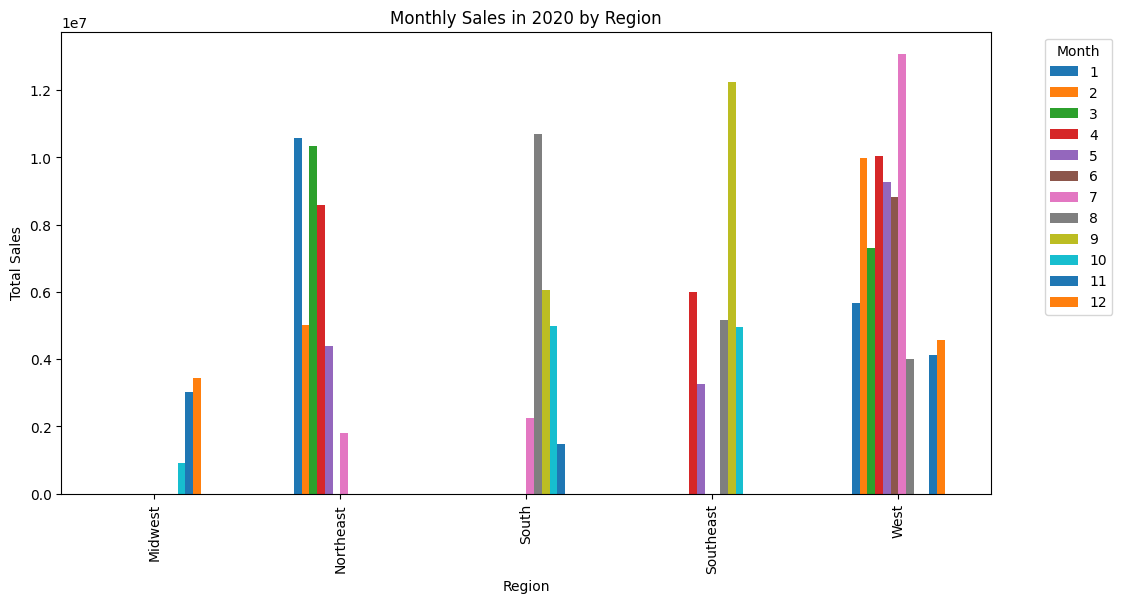

In [ ]:
import matplotlib.pyplot as plt

data['Month'] = data['Invoice Date'].dt.month
data['Year'] = data['Invoice Date'].dt.year

sales_2020 = data[data['Year'] == 2020]

monthly_sales = sales_2020.groupby(['Region', 'Month'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales.plot(kind='bar', ax=ax)

plt.title('Monthly Sales in 2020 by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### k. Draw the plot to show year wise sales in every region.

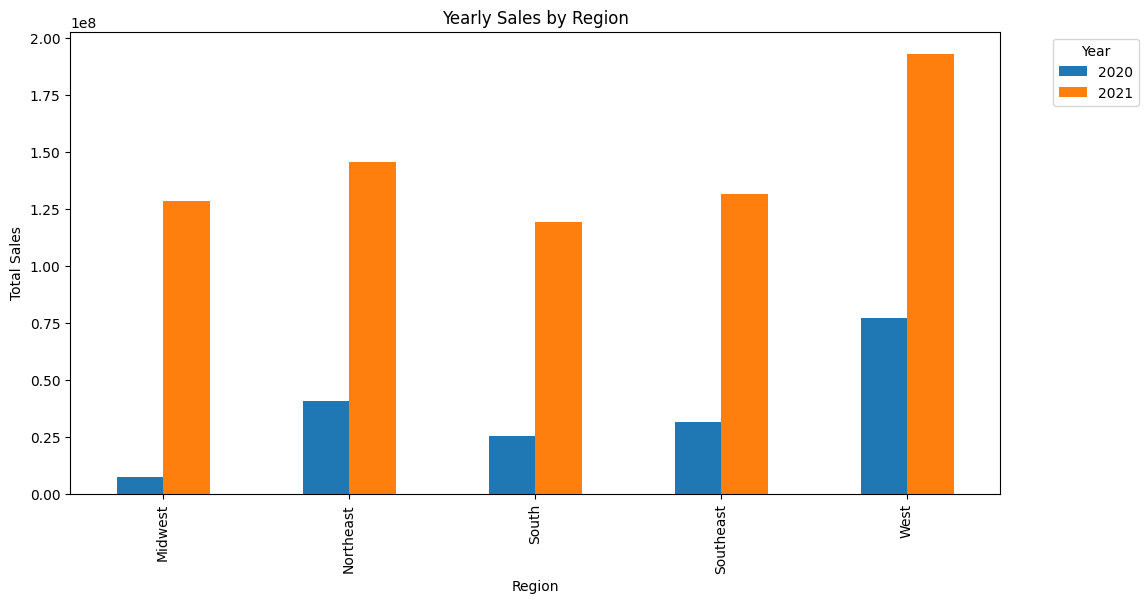

In [ ]:
import matplotlib.pyplot as plt

data['Year'] = data['Invoice Date'].dt.year

yearly_sales = data.groupby(['Region', 'Year'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
yearly_sales.plot(kind='bar', ax=ax)

plt.title('Yearly Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### l. Draw plots to show Region wise sales in every year.

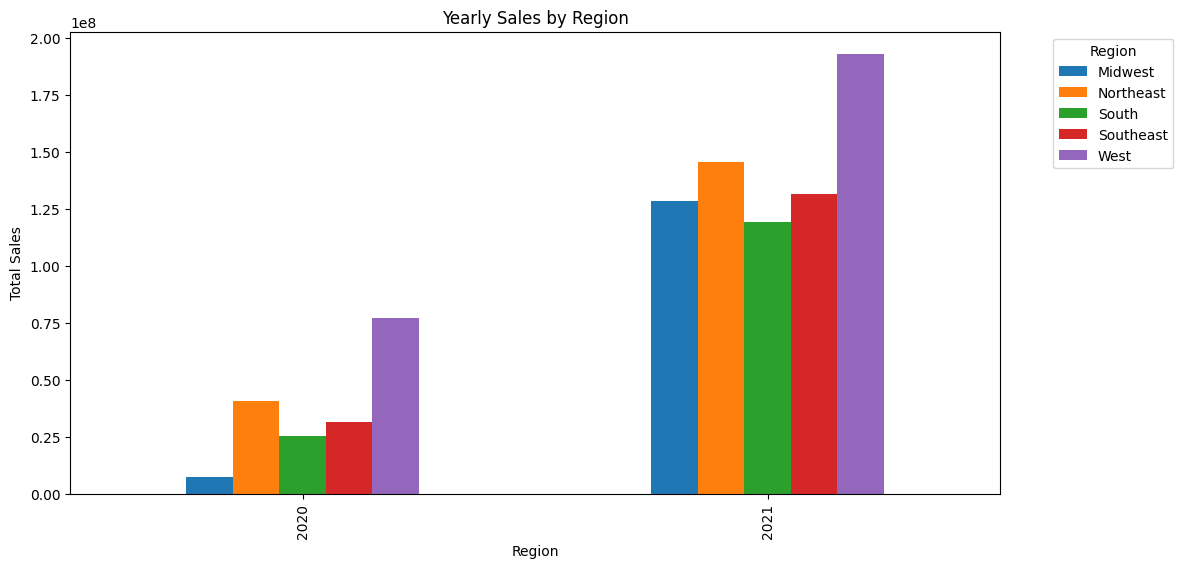

In [ ]:
import matplotlib.pyplot as plt

data['Year'] = data['Invoice Date'].dt.year

yearly_sales = data.groupby(['Year', 'Region'])['Total Sales'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
yearly_sales.plot(kind='bar', ax=ax)

plt.title('Yearly Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()